In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
import pandas as pd
from konlpy.tag import Mecab
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
m = Mecab()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/Colab Notebooks/kidchosun.json'
df = pd.read_json(filename, lines=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
noun = set(["NNG", "NNP", "NP"])
verb_adject = set(["VV", "VA"])
word_list = []

In [ ]:
for title in df['title'].to_list():
    for word,tag in m.pos(title):
        if tag in verb_adject:
            word_list.append(word+"다")
        elif tag in noun:
            word_list.append(word)

In [ ]:
num = 150
counts = Counter(word_list)
selected = counts.most_common(num)

In [ ]:
wc = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/BMJUA_otf.otf', 
               background_color="black", 
               max_font_size=60)


In [ ]:
cloud = wc.generate_from_frequencies(dict(selected))
# save as file
# cloud.to_file('test.jpg')

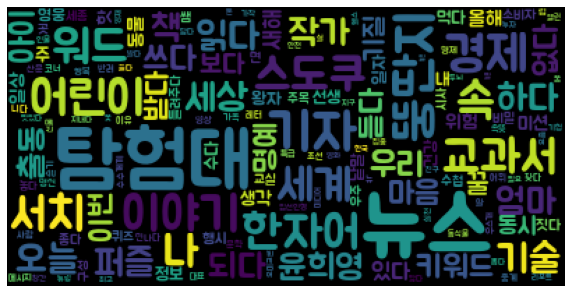

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()